# Supervised Learning

In [1]:
# examine the first 5 rows of X (including the feature names)
import pandas as pd
# Splitting data into training/testing
from sklearn.model_selection import train_test_split
df =  pd.read_csv("df_data_Global_final.csv")
df.head()

,Unnamed: 0,Unnamed: 0.1,created_at,text,source,name,username,location,description,location2,coordinates,state,country,text_clean,sentiment,sentiment_1
0,0,8,2022-04-07 23:59:23+00:00,"Sigh and wonder how the decimal on my ""concurr...",TweetDeck,Fusionx,rofldrg,"Seattle, WA",andrew copeland content podcast producer https...,"Seattle, King County, Washington, United States","(47.6038321, -122.3300624, 0.0)",Seattle,United States,sigh and wonder how the decimal on my concurre...,neg,0
1,1,16,2022-04-07 23:58:50+00:00,"🍔: Well, guess I should let y'all know I've be...",Twitter for Android,Aaron Schneider,aschneider_96,"Kansas City, MO",civil engineer university nebraska alumni,"Kansas City, Jackson County, Missouri, United ...","(39.100105, -94.5781416, 0.0)",Kansas City,United States,: well guess i should let y'all know i've been...,neg,0
2,2,19,2022-04-07 23:58:11+00:00,@SEGAbits McDonald's now with the depression meal,Twitter Web App,Dr. Ewa J. Antczak,Core_IdealMe,"Mississauga, Ontario",psychologist founder idealme enrichment founda...,"Mississauga, Peel Region, Golden Horseshoe, On...","(43.5896231, -79.6443879, 0.0)",Mississauga,Canada,segabits mcdonald's now with the depression meal,neg,0
3,3,21,2022-04-07 23:58:03+00:00,@Amer1can_Barbie There is a huge difference be...,Twitter for iPhone,"Andrew, Cymro, 🏴󠁧󠁢󠁷󠁬󠁳󠁿🇪🇺🇺🇦🇵🇸, #NHS💙",_Annibyniaeth,"Caerphilly, Wales",dm invite covid x husband father retired life ...,"Cymru / Wales, United Kingdom","(52.2928116, -3.73893, 0.0)",Cymru / Wales,United Kingdom,amercanbarbie there is a huge difference betwe...,neg,0
4,4,34,2022-04-07 23:56:59+00:00,depression tucks me in at 7pm sharp every night,Twitter for iPhone,Bubbles,BigBankBubbles_,"Atlanta, GA",go beach bring back seashell longliveni,"Atlanta, Fulton County, Georgia, United States","(33.7489924, -84.3902644, 0.0)",Atlanta,United States,depression tucks me in at pm sharp every night,neg,0


### Train Test Split
Training set is 75% and testing set is 25%.

In [2]:
# 75% is for training and 25% is for testing
X_train, X_test, y_train, y_test = train_test_split(df['text_clean'], df['sentiment_1'], 
                                                    test_size = 0.25,
                                                    random_state=123)

In [3]:
# train dataset
print("Training data shape X:",X_train.shape)
print("Training data shape Y:",y_train.shape)
# test dataset
print("Test data shape X:",X_test.shape)
print("Test data shape Y:",y_test.shape)

Training data shape X: (18247,)
Training data shape Y: (18247,)
Test data shape X: (6083,)
Test data shape Y: (6083,)


### Create TF-IDF MODEL
TF-IDF stands for Term Frequency-Inverse Document Frequency.Instead of giving more weight to words that occur more frequently, it gives a higher weight to words that occur less frequently across entire dataset.
1. Instatiate the vectorization 
   - Set max_features to 2000, which means we want to use 2000 most occuring      words as features for training our classifier.
   - min_df set to 5, corresponds to the minimum number of documents that 
     should contain this feature. We only include those words that occur in at 
     least 5 documents.
   - max_df set to 0.7, which means that we should only include those words   
     that occur in a maximum of 70% of all documents.
   - remove english stopword, they do not contain any useful information.
   - set words into lowercase
   - ngram_range is set from 1 to 2, which means include bigram and ngram as 
     features.
2. Create document term matrix
   - Describes the frequency of words that occurs in a collection of documents.

In [4]:
#Extracting features from text files. 
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

# instantiate the vectorizer.
num_features = 3000
vect = TfidfVectorizer(max_features=num_features,ngram_range=(1, 2),stop_words='english', min_df=5, max_df=0.70, lowercase=True)

In [5]:
# fit on training data and transform the training data to vector (document-term matrix)
X_train_dtm = vect.fit_transform(X_train)

In [6]:
#examine the document-term matrix
X_train_dtm

<18247x3000 sparse matrix of type '<class 'numpy.float64'>'
	with 171162 stored elements in Compressed Sparse Row format>

In [7]:
#transform testing data (using fitted vocabulary)  into a document-term matrix, name it as X_test_dsm
X_test_dtm = vect.transform(X_test)

In [8]:
#examine the document-term matrix
X_test_dtm

<6083x3000 sparse matrix of type '<class 'numpy.float64'>'
	with 56114 stored elements in Compressed Sparse Row format>

### Logistics Regression

Max_iter= maximum number of iterations taken for the solver to converge.

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
#instantiate a logistic regression model
logreg = LogisticRegression(max_iter=1000, random_state=0)

In [10]:
%time logreg.fit(X_train_dtm, y_train)

Wall time: 231 ms


LogisticRegression(max_iter=1000, random_state=0)

In [11]:
# make class predictions for X_test_dtm
y_pred_class = logreg.predict(X_test_dtm)

# calculate accuracy
print("Accuracy of Logistic Regression model is", accuracy_score(y_test, y_pred_class))
print("Precision of Logistic Regression model is", precision_score(y_test, y_pred_class))
print("Recall of Logistic Regression model is", recall_score(y_test, y_pred_class))
print("F1 Score of Logistic Regression model is", f1_score(y_test, y_pred_class))

Accuracy of Logistic Regression model is 0.7596580634555318
Precision of Logistic Regression model is 0.7416918429003021
Recall of Logistic Regression model is 0.467174119885823
F1 Score of Logistic Regression model is 0.5732632807939287


### Support Vector Machine
- Kernel = Similarity function for pattern analysis
- C = Penalty parameter and helps in finding the bounderies smoothly and appropriately.

In [12]:
from sklearn.svm import SVC
clf = SVC(kernel='linear', C=1, random_state=0)

# train the model using X_train_dtm and report training time
%time clf.fit(X_train_dtm, y_train)


Wall time: 27.2 s


SVC(C=1, kernel='linear', random_state=0)

In [13]:
# make class predictions for X_test_dtm
y_pred_class = clf.predict(X_test_dtm)
# calculate accuracy
print("Accuracy of Support Vector Machine model is", accuracy_score(y_test, y_pred_class))
print("Precision of Support Vector Machine model is", precision_score(y_test, y_pred_class))
print("Recall of Support Vector Machine model is", recall_score(y_test, y_pred_class))
print("F1 Score of Support Vector Machine model is", f1_score(y_test, y_pred_class))

Accuracy of Support Vector Machine model is 0.7593292783166201
Precision of Support Vector Machine model is 0.7256011315417256
Recall of Support Vector Machine model is 0.48810656517602286
F1 Score of Support Vector Machine model is 0.5836177474402731


In [14]:
clf2 = SVC(kernel='rbf', random_state=0)
# train the model using X_train_dtm and report training time
%time clf2.fit(X_train_dtm, y_train)

Wall time: 1min 24s


SVC(random_state=0)

In [15]:
# make class predictions for X_test_dtm
y_pred_class = clf2.predict(X_test_dtm)
# calculate accuracy
print("Accuracy of Support Vector Machine model is", accuracy_score(y_test, y_pred_class))
print("Precision of Support Vector Machine model is", precision_score(y_test, y_pred_class))
print("Recall of Support Vector Machine model is", recall_score(y_test, y_pred_class))
print("F1 Score of Support Vector Machine model is", f1_score(y_test, y_pred_class))

Accuracy of Support Vector Machine model is 0.791221436791057
Precision of Support Vector Machine model is 0.7913165266106442
Recall of Support Vector Machine model is 0.5375832540437678
F1 Score of Support Vector Machine model is 0.6402266288951841


### Naive Bayes
- alpha represents the additive smoothing parameter.

In [35]:
from sklearn.naive_bayes import MultinomialNB
NB = MultinomialNB()
%time NB.fit(X_train_dtm, y_train)

Wall time: 25.1 ms


MultinomialNB()

In [36]:
# make class predictions for X_test_dtm
y_pred_class = NB.predict(X_test_dtm)
# calculate accuracy
print("Accuracy of Naiye Bayes model is",accuracy_score(y_test, y_pred_class))
print("Precision of Naive Bayes model is", precision_score(y_test, y_pred_class))
print("Recall of Naive Bayes model is", recall_score(y_test, y_pred_class))
print("F1 Score of Naive Bayes model is", f1_score(y_test, y_pred_class))

Accuracy of Naiye Bayes model is 0.7432188065099458
Precision of Naive Bayes model is 0.7721774193548387
Recall of Naive Bayes model is 0.3644148430066603
F1 Score of Naive Bayes model is 0.4951519069166128


### Decision Tree
- default parameters. For example, criterion is set as 'gini'. 

In [33]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
%time dt.fit(X_train_dtm, y_train)

Wall time: 4 s


DecisionTreeClassifier()

In [34]:
# make class predictions for X_test_dtm
y_pred_class = dt.predict(X_test_dtm)
# calculate accuracy
print("Accuracy of Decision tree model is",accuracy_score(y_test, y_pred_class))
print("Precision of Decision tree model is", precision_score(y_test, y_pred_class))
print("Recall of Decision tree model is", recall_score(y_test, y_pred_class))
print("F1 Score of Decision tree model is", f1_score(y_test, y_pred_class))

Accuracy of Decision tree model is 0.7601512411638994
Precision of Decision tree model is 0.6562955760816723
Recall of Decision tree model is 0.6422454804947669
F1 Score of Decision tree model is 0.6491945179129598


### Random Forest
Random Forest is an ensemble model using bagging as the ensemble method and decision tree as individual model.

In [127]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100, max_features="auto", random_state=0)

# train the model using X_train_dtm and report training time
%time classifier.fit(X_train_dtm, y_train) 

Wall time: 17.6 s


RandomForestClassifier(random_state=0)

In [128]:
# make class predictions for X_test_dtm
y_pred_class = classifier.predict(X_test_dtm)
# calculate accuracy
print("Accuracy of Random Forest model is",accuracy_score(y_test, y_pred_class))
print("Precision of Random Forest model is", precision_score(y_test, y_pred_class))
print("Recall of Random Forest model is", recall_score(y_test, y_pred_class))
print("F1 Score of Random Forest model is", f1_score(y_test, y_pred_class))

Accuracy of Random Forest model is 0.8068387308893638
Precision of Random Forest model is 0.7927984838913456
Recall of Random Forest model is 0.5970504281636536
F1 Score of Random Forest model is 0.6811397557666213


0.8068387308893638

### AdaBoost model
Ensemble boosting classifier. Combines multiple classifiers to increase the accuracy of classifiers. The core principle of AdaBoost is to fit a sequence of weak learners on repeatly modified version of data. Learning from the previous mistake.

In [191]:
from sklearn.ensemble import AdaBoostClassifier
#n_estimators is the base classifier.
Adc =  AdaBoostClassifier(n_estimators=5, base_estimator=classifier, random_state=0)

# train the model using X_train_dtm and report training time
%time Adc.fit(X_train_dtm, y_train) 

Wall time: 2min 57s


AdaBoostClassifier(base_estimator=RandomForestClassifier(random_state=0),
                   n_estimators=5, random_state=0)

In [192]:
# make class predictions for X_test_dtm
y_pred_class = Adc.predict(X_test_dtm)
# calculate accuracy
print("Accuracy of AdaBoost is",accuracy_score(y_test, y_pred_class))
print("Precision of AdaBoost is", precision_score(y_test, y_pred_class))
print("Recall of AdaBoost is", recall_score(y_test, y_pred_class))
print("F1 Score of AdaBoost is", f1_score(y_test, y_pred_class))
accuracy_score(y_test, y_pred_class)

Accuracy of AdaBoost is 0.8097977971395693
Precision of AdaBoost is 0.7932960893854749
Recall of AdaBoost is 0.6079923882017126
F1 Score of AdaBoost is 0.6883921357392943


0.8097977971395693

### Neural Network
- Hidden Layer size: Hidden_layer_sizes-(100,50,20) means there are 3 hidden layers and the number of neurons for layer one is 100, for layer 2 is 50 and for layer 3 is 20.
- activation: Activation function for hidden layer. Relu is the rectified linear unit function, returns f(x) = max(0,x)
- max_iter: maximum number of iterations for solver to converge, set as 500.

In [142]:
from sklearn.neural_network import MLPClassifier
# initialize model
mlp = MLPClassifier(hidden_layer_sizes=(100, 50, 20), activation='relu', max_iter=500, random_state=0)

# train the model using X_train_dtm and report training time
%time mlp.fit(X_train_dtm, y_train)

Wall time: 2min 57s


MLPClassifier(hidden_layer_sizes=(100, 50, 20), max_iter=500, random_state=0)

In [141]:
# make class predictions for X_test_dtm
y_pred_class = mlp.predict(X_test_dtm)
# calculate accuracy
print("Accuracy of Neural Network is",accuracy_score(y_test, y_pred_class))
print("Precision of Neural Network is", precision_score(y_test, y_pred_class))
print("Recall of Neural Network is", recall_score(y_test, y_pred_class))
print("F1 Score of Neural Network is", f1_score(y_test, y_pred_class))
accuracy_score(y_test, y_pred_class)

Accuracy of Neural Network is 0.7882623705408516
Precision of Neural Network is 0.7010869565217391
Recall of Neural Network is 0.6750713606089439
F1 Score of Neural Network is 0.6878332525448376


0.7882623705408516

### Conclusion


In [48]:
# import pandas as pd
import matplotlib.pyplot as plt
from datetime import time


df = pd.DataFrame({'Machine Learning Model':['Logistic Regression', 'Support Vector Machine', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'AdaBoostModel','Nueral Network'],
                   'TimeInSec':[0.181,72,0.006,3.88,17.6,143,177],
                   'Accuracy':[(0.7596580634555318*100),(0.791221436791057*100),(0.7432188065099458*100),(0.7614663817195463*100),(0.8068387308893638*100),(0.8097977971395693*100),(0.7882623705408516*100)],
                   'Precision':[(0.7416918429003021*100),(0.7721774193548387*100),(0.7721774193548387*100),(0.6562955760816723*100), (0.7927984838913456*100), (0.7932960893854749*100), (0.7010869565217391*100)],
                   'Recall':[(0.467174119885823*100), (0.48810656517602286*100), (0.3644148430066603*100), (0.6422454804947669*100),(0.5970504281636536*100),(0.6079923882017126*100),(0.6750713606089439*100) ],
                   'F1':[(0.5732632807939287*100),(0.6402266288951841*100),(0.4951519069166128*100), (0.649770697562153*100),(0.6811397557666213*100),(0.6883921357392943*100),(0.6878332525448376*100)]
                  })
df

,Machine Learning Model,TimeInSec,Accuracy,Precision,Recall,F1
0,Logistic Regression,0.181,75.965806,74.169184,46.717412,57.326328
1,Support Vector Machine,72.000,79.122144,77.217742,48.810657,64.022663
2,Naive Bayes,0.006,74.321881,77.217742,36.441484,49.515191
3,Decision Tree,3.880,76.146638,65.629558,64.224548,64.977070
4,Random Forest,17.600,80.683873,79.279848,59.705043,68.113976
5,AdaBoostModel,143.000,80.979780,79.329609,60.799239,68.839214
6,Nueral Network,177.000,78.826237,70.108696,67.507136,68.783325


Text(0.5, 1.0, 'Accuracy of Machine Learning Classifiers')

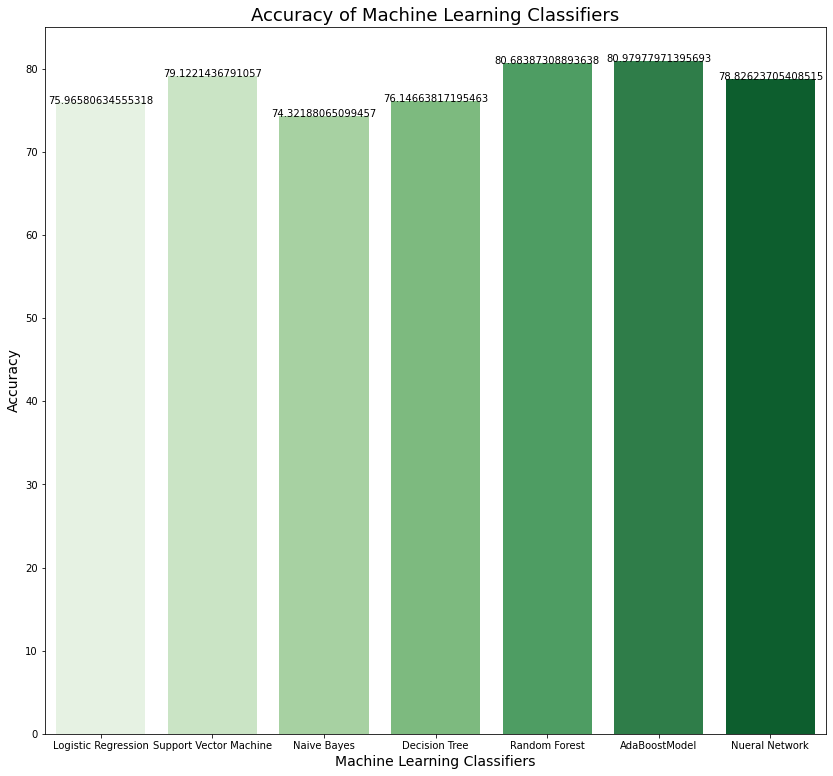

In [39]:
import seaborn as sns

plt.figure(figsize=(14, 13))
splot = sns.barplot(x='Machine Learning Model', y='Accuracy', 
                    data=df, palette='Greens')
  
for p in splot.patches:
    splot.annotate(format(p.get_height()),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 2),
                   textcoords='offset points')
      
plt.ylabel("Accuracy", size=14)
plt.xlabel("Machine Learning Classifiers", size=14)
plt.title("Accuracy of Machine Learning Classifiers", size=18)

Text(0.5, 1.0, 'Precision Score of Machine Learning Classifiers')

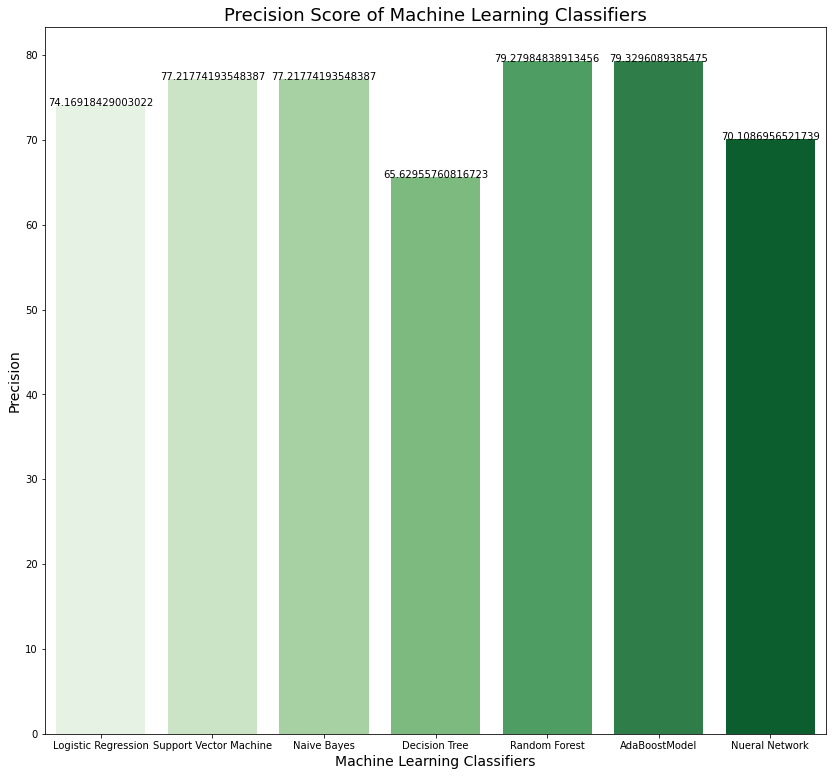

In [44]:
plt.figure(figsize=(14, 13))
splot = sns.barplot(x='Machine Learning Model', y='Precision', 
                    data=df, palette='Greens')
  
for p in splot.patches:
    splot.annotate(format(p.get_height()),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 2),
                   textcoords='offset points')
      
plt.ylabel("Precision", size=14)
plt.xlabel("Machine Learning Classifiers", size=14)
plt.title("Precision Score of Machine Learning Classifiers", size=18)

Text(0.5, 1.0, 'Recall Score of Machine Learning Classifiers')

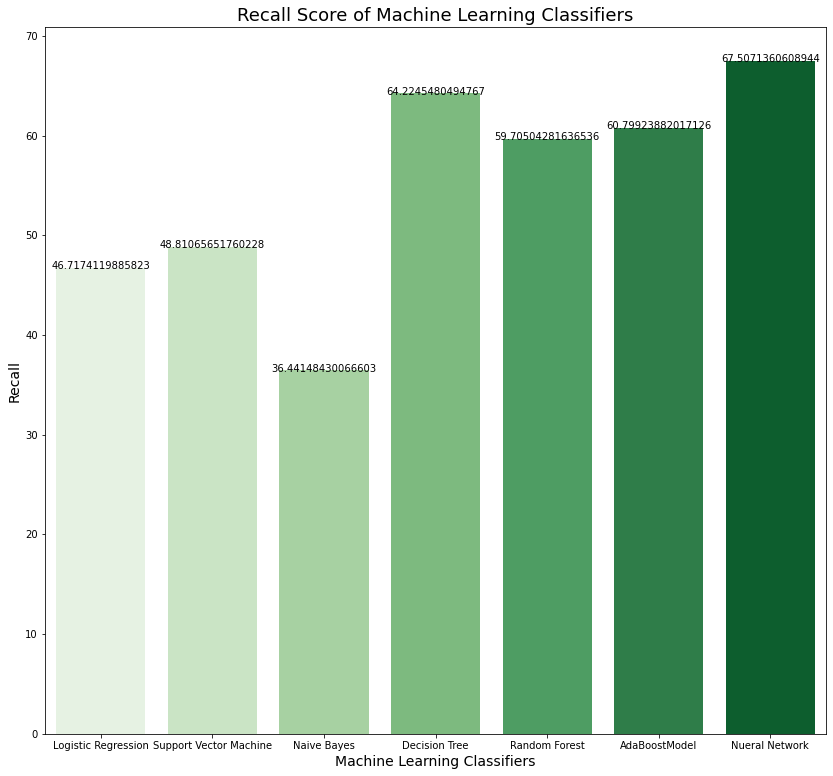

In [49]:
plt.figure(figsize=(14, 13))
splot = sns.barplot(x='Machine Learning Model', y='Recall', 
                    data=df, palette='Greens')
  
for p in splot.patches:
    splot.annotate(format(p.get_height()),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 2),
                   textcoords='offset points')
      
plt.ylabel("Recall", size=14)
plt.xlabel("Machine Learning Classifiers", size=14)
plt.title("Recall Score of Machine Learning Classifiers", size=18)

Text(0.5, 1.0, 'F1 Score of Machine Learning Classifiers')

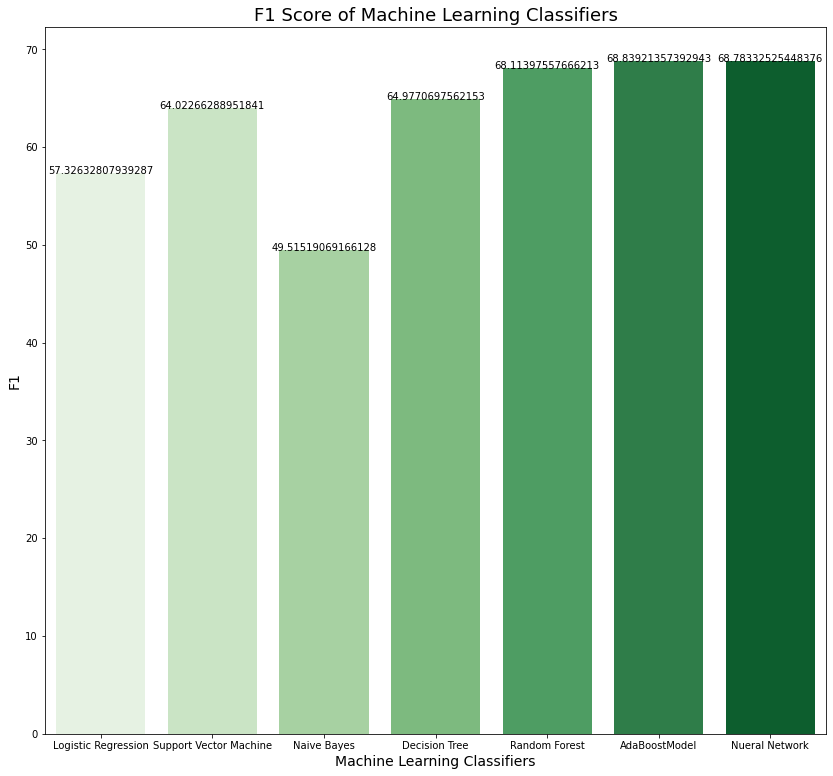

In [237]:
plt.figure(figsize=(14, 13))
splot = sns.barplot(x='Machine Learning Model', y='F1', 
                    data=df, palette='Greens')
  
for p in splot.patches:
    splot.annotate(format(p.get_height()),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 2),
                   textcoords='offset points')
      
plt.ylabel("F1", size=14)
plt.xlabel("Machine Learning Classifiers", size=14)
plt.title("F1 Score of Machine Learning Classifiers", size=18)

Text(0.5, 1.0, "'TimeInSec' of Training Machine Learning Classifiers")

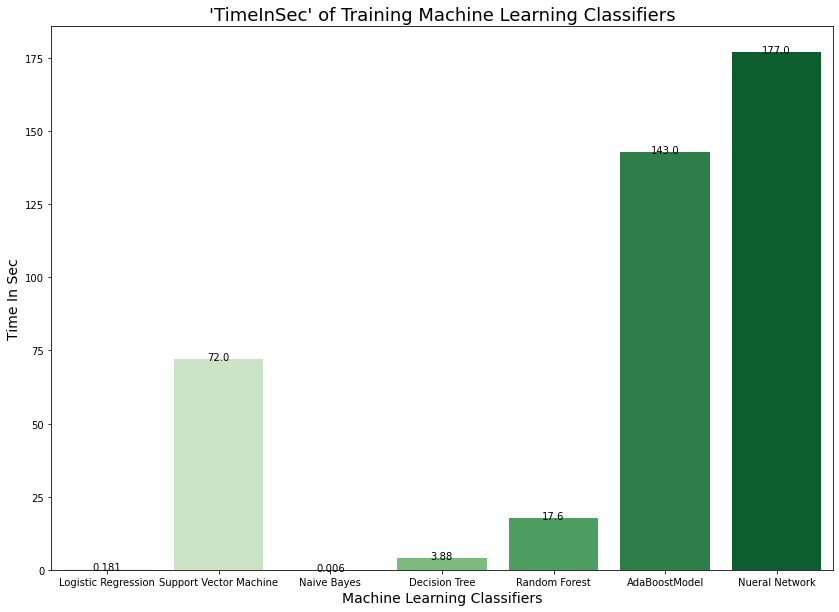

In [238]:
plt.figure(figsize=(14, 10))
splot = sns.barplot(x='Machine Learning Model', y='TimeInSec', 
                    data=df, palette='Greens')
  
for p in splot.patches:
    splot.annotate(format(p.get_height()),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 2),
                   textcoords='offset points')
      
plt.ylabel("Time In Sec", size=14)
plt.xlabel("Machine Learning Classifiers", size=14)
plt.title("'TimeInSec' of Training Machine Learning Classifiers", size=18)

AdaBoostModel has the highest accuracy and highest F1 score, but it takes a longer time to run.